In [1]:
## Basic Import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
## Modelling 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor
import warnings

In [2]:
!pip install catboost

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=['math score'])
y = df['math score'] 

In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [8]:
print("Categories in gender variable:", end=" ")
print(df['gender'].unique())

print("Categories in race/ethnicity:", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education':", end=" ")
print(df['parental level of education'].unique())

print("Categories in lunch:", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course':", end=" ")
print(df['test preparation course'].unique())

Categories in gender variable: ['female' 'male']
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in 'test preparation course': ['none' 'completed']


In [9]:
## Create Column Transformer with 3 types of Transformer
## It is a list of tuples
## Column Transformer(name, Transformer, column)

num_features= X.select_dtypes(exclude = "object").columns
cat_features= X.select_dtypes(include = "object").columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
   [ 
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features)
   ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
## Seperate dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(), 
    "Random Forest Regressor": RandomForestRegressor(), 
    "XGBRegressor": XGBRegressor(), 
    "CatBoost": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    ## Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate Train and Test dataset 
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print("Model Performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model Performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Ridge
Model Performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Lasso
Model Performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model Performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


K-Neighbors Regressor
Model Performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

## Results

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
1,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoost,0.851632
5,Random Forest Regressor,0.851202
8,AdaBoostRegressor,0.849910
6,XGBRegressor,0.827797
2,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.741245


## Linear Regression

In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


# Plot y_test and y_pred

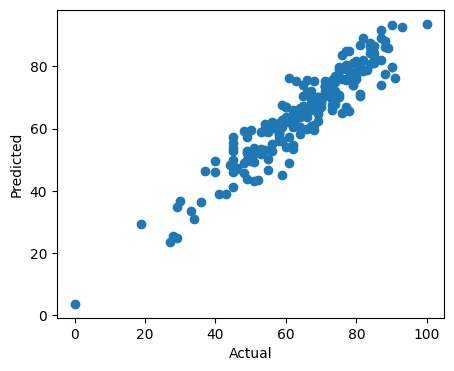

In [25]:
plt.figure(figsize=[5, 4])
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math score'>

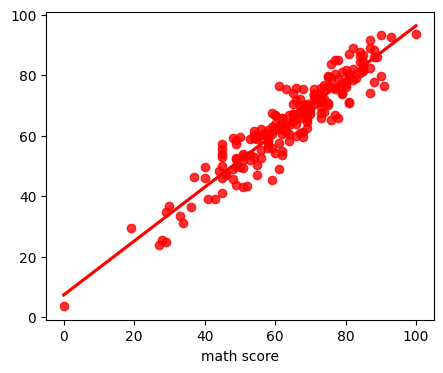

In [26]:
plt.figure(figsize=[5, 4])
sns.regplot(x=y_test, y=y_pred, ci=None, color='red') 

### Difference between Actual and Predicted values

In [27]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'difference': y_test-y_pred})
pred_df.head()

,Actual Value,Predicted Value,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
